In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Load the data
df = pd.read_csv("Data/filtered_football_data.csv")

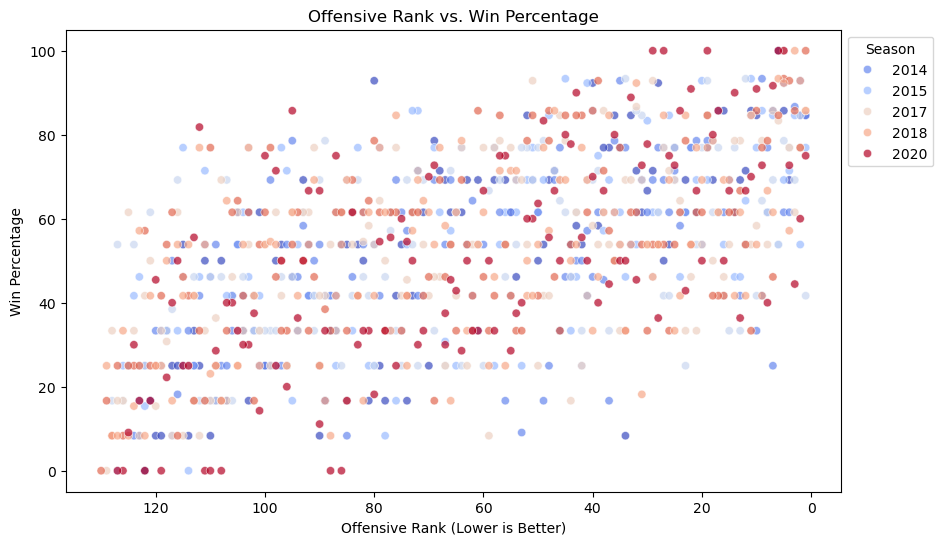

In [3]:
#EDA

#scatter plot: offensive fanking vs. win percentage 
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Off.Rank", y=df["Win"] / df["Games"] * 100, hue="Season", palette="coolwarm", alpha=0.7)
plt.title("Offensive Rank vs. Win Percentage")
plt.xlabel("Offensive Rank (Lower is Better)")
plt.ylabel("Win Percentage")
plt.gca().invert_xaxis()  # lower offensive rank is better, so reverse x-axis
plt.legend(title="Season", bbox_to_anchor=(1, 1))
plt.show()


/var/folders/c8/q7j5g0wj73s806hqbvp128c40000gq/T/ipykernel_73108/3567290725.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Winning_Team", y="Turnover.Margin", palette=["red", "green"])


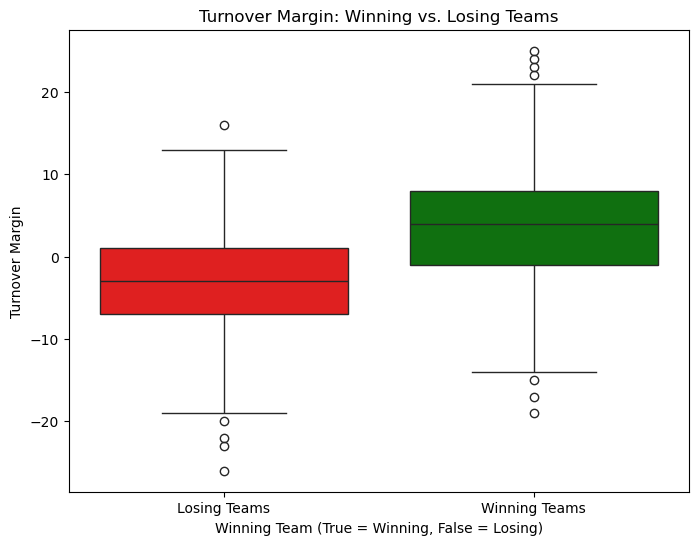

In [4]:
#box plot: turnover margin for winning vs. losing teams
df["Win_Percentage"] = df["Win"] / df["Games"]
df["Winning_Team"] = df["Win_Percentage"] > 0.5  # true for winning teams, false for losing teams

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x="Winning_Team", y="Turnover.Margin", palette=["red", "green"])
plt.title("Turnover Margin: Winning vs. Losing Teams")
plt.xlabel("Winning Team (True = Winning, False = Losing)")
plt.ylabel("Turnover Margin")
plt.xticks([0, 1], ["Losing Teams", "Winning Teams"])
plt.show()

In [ ]:
#time series plot: passing vs.rushing yards per game over time
df_grouped = df.groupby("Season")[["Pass.Yards.Per.Game", "Rushing.Yards.per.Game"]].mean()

plt.figure(figsize=(10, 6))
plt.plot(df_grouped.index, df_grouped["Pass.Yards.Per.Game"], marker="o", label="Passing Yards per Game")
plt.plot(df_grouped.index, df_grouped["Rushing.Yards.per.Game"], marker="s", label="Rushing Yards per Game")
plt.title("Passing vs. Rushing Yards per Game Over Time")
plt.xlabel("Season")
plt.ylabel("Yards per Game")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#histogram: penalty counts
plt.figure(figsize=(8, 5))
sns.histplot(df["Penalties"], bins=20, kde=True, color="purple")
plt.title("Distribution of Penalties Across Teams")
plt.xlabel("Number of Penalties")
plt.ylabel("Frequency")
plt.show()

In [ ]:
#bar chart: win percentage by offensive yardage ranking
df["Offensive_Rank_Group"] = pd.cut(df["Off.Rank"], bins=[0, 50, 100, 130], labels=["Top 50", "Mid 50-100", "Bottom 100+"])
df_grouped = df.groupby("Offensive_Rank_Group")["Win_Percentage"].mean()

plt.figure(figsize=(8, 5))
df_grouped.plot(kind="bar", color=["green", "orange", "red"])
plt.title("Win Percentage by Offensive Ranking Group")
plt.xlabel("Offensive Ranking Group")
plt.ylabel("Average Win Percentage")
plt.xticks(rotation=0)
plt.show()
